<a href="https://colab.research.google.com/github/nithin-dot/Python_Projects/blob/master/Company_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [174]:
Manual_data=pd.read_csv('./Startup/ManualCollected.csv')
data_Analytics=pd.read_csv('./Startup/ClusterData.csv')
Start_up_data=pd.read_csv('./Startup/Indian_Register_startup.csv')

Top Trending Industry



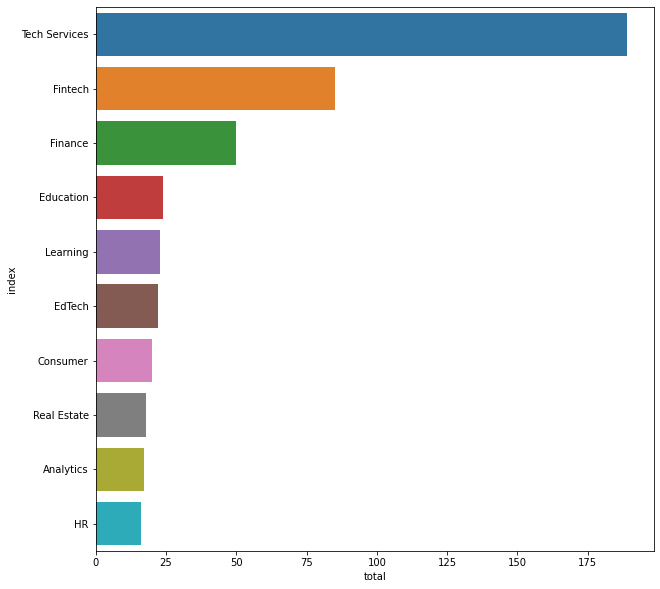

In [302]:
print("Top Trending Industry\n")
Top_Industry=Start_up_data['Industry'].value_counts().sort_values(ascending=False).head(10).reset_index(name='total')
plt.figure(figsize=(10,10))
sns.barplot(orient = 'h',data=Top_Industry,y='index', x='total',)
plt.show()

In [297]:
print("Top City Location\n")
label10=np.arange(0,10)
Top_city=Start_up_data['City'].value_counts().sort_values(ascending=False).head(10)
fig=go.Figure(data=[go.Bar(y=Top_city.values,x=Top_city.index, marker={'color':label10})])
fig.update_layout(autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"  
fig

Top City Location



Top Favourite hiring Company 



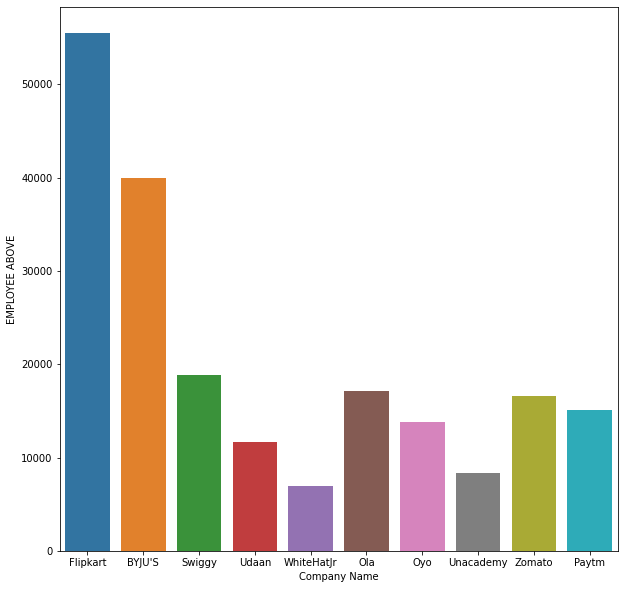

In [305]:
todays_date = date.today()
Val=abs(Manual_data.Founded.sub(todays_date.year))
Manual_data["Average"]=(Manual_data['EMPLOYEE ABOVE'].div(Val)).astype(int)
Top_fav=Manual_data.sort_values(by=['Average'], ascending=[False])[['EMPLOYEE ABOVE','Company Name']].head(10)
print("Top Favourite hiring Company \n")
plt.figure(figsize=(10,10))
sns.barplot(data=Top_fav,y='EMPLOYEE ABOVE', x='Company Name',)
plt.show()



In [181]:
Funding_list = ['Pre-seed','Seed','Undisclosed']
print("TOP Gorwing Startup")
Growing_Startup=Manual_data.loc[~Manual_data['FUNDING TYPE'].isin(Funding_list)& (Manual_data['Founded']>2005)]
Serieses=Growing_Startup['FUNDING TYPE'].replace("Bootstrap","Series B").str.split(" ", n = 1, expand = True)
Growing_Startup["Series"]=Serieses[1]
del Growing_Startup['Average']
Growing_Startup.sort_values(by=["Series"], ascending=[False],na_position='first').reset_index(drop=True).rename_axis('Rank').loc[:, ~Growing_Startup.columns.isin(['Series'])].head(30)

TOP Gorwing Startup


,Company Name,Founded,INDUSTRY,LOCATION,FUNDING TYPE,EMPLOYEE ABOVE
Rank,,,,,,
0,BYJU'S,2011,E-learning,Bengaluru,debt-fin,40000
1,Freshworks,2010,Saas,Chennai,IPO,6000
2,Razorpay,2014,FinTech,Bengaluru,IPO,2200
3,Paytm,2009,FinTech,Noida,IPO,15110
4,Meesho,2015,E-commerce,Bengaluru,debt-fin,5490
5,Urban Comapny,2014,E-commerce,Gurgaon,IPO,3140
6,Nykaa,2012,E-commerce,Mumbai,IPO,2770
7,Ajio,2016,E-commerce,Bengaluru,IPO,1440
8,Oyo,2012,Hotel-Booking,Gurgaon,IPO,13830


In [287]:
indian_startup=data_Analytics.loc[(data_Analytics['country']=='India')&(data_Analytics['founded']>2010)]
print("Top Budding Startup In Data_Analytics")
Filtr_1 = indian_startup["growth_percentage"].rank()
Filtr_2 = indian_startup["estimated_revenues"].rank()
indian_startup["Over_all"] =Filtr_1+Filtr_2
indian_startup.sort_values(by=["Over_all"], ascending=[False]).reset_index(drop=True).rename_axis('Rank').loc[:, ~indian_startup.columns.isin(['Over_all'])].head(20)

Top Budding Startup In Data_Analytics


,company_name,city,country,employees,founded,CityRanking,estimated_revenues,growth_percentage
Rank,,,,,,,,
0,1K Kirana Bazaar,Gurgaon,India,308,2018,1,26950000,422.0
1,Pickrr,Gurgaon,India,333,2015,5,29137500,283.0
2,Yellow Messenger,Bangalore,India,827,2016,267,82782700,60.0
3,VuNet Systems,Bangalore,India,129,2014,86,9030000,108.0
4,iElektron Technologies,Chennai,India,104,2017,7,7280000,189.0
5,ixamBee,New Delhi,India,90,2016,21,6300000,109.0
6,BetterHalf,Bangalore,India,54,2016,213,6804000,69.0
7,fleetx.io,Gurgaon,India,270,2017,62,20790000,50.0
8,Ripplr,Bangalore,India,70,2019,61,4410000,150.0


In [172]:
def converter(x):
  try:
    if 'M' in x:
        return f"{(float(x.rstrip('M').lstrip('$'))*1000000):,.2f}"
    elif 'B' in x:
        return f"{(float(x.rstrip('B').lstrip('$'))*1000000000):,.2f}"
    elif '$0' not in x:
       return x
  except:
      return x
print("Top Fin-Tech_stratup")
Start_up_data['Revenue']=Start_up_data['Revenue'].apply(converter)
Start_up_Rank_1 = Start_up_data["Employee"].rank()
Start_up_Rank_2 = Start_up_data["Revenue"].rank()
Start_up_Rank_3 = Start_up_data["Growth Stats"].rank()
Start_up_data["Over_all"] =Start_up_Rank_1+Start_up_Rank_2+Start_up_Rank_3
Start_up_data=Start_up_data.sort_values(by=["Over_all"], ascending=[False]).loc[:, ~Start_up_data.columns.isin(['Over_all'])]
Start_up_data.loc[Start_up_data['Industry']=='Fintech'].head(20).reset_index(drop=True).rename_axis('Rank')

Top Fin-Tech_stratup


,Company Name,City,Industry,Employee,Revenue,Growth Stats
Rank,,,,,,
0,Upstox,Mumbai,Fintech,2284,"456,800,000.00",250.0
1,"Groww, India",Bangalore,Fintech,921,"95,800,000.00",107.0
2,CRED,Bangalore,Fintech,884,"91,900,000.00",80.0
3,BillDesk,Mumbai,Fintech,600,"48,800,000.00",589.0
4,State Bank of I...,Mumbai,Fintech,91319,"8,300,000,000.00",21.0
5,Jana Small Fina...,Bangalore,Fintech,7638,"695,100,000.00",25.0
6,IndoStar,Mumbai,Fintech,988,"89,900,000.00",28.0
7,WazirX,NaN,Fintech,529,"43,000,000.00",405.0
8,slice,Bangalore,Fintech,621,"50,500,000.00",117.0
